In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

In [11]:
reference = np.loadtxt("transmission_function_method1/reference/ET_hs.dat")


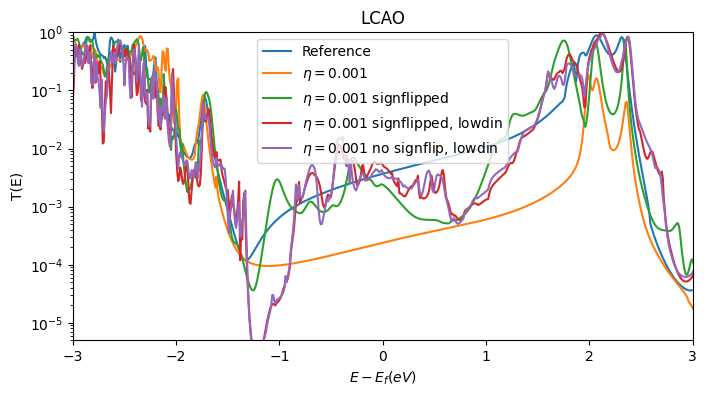

In [13]:
# etas = [1e-3, 1e-2, 1e-1]
etas = [1e-3]
plt.figure(figsize=(8,4))
plt.plot(reference[:,0],reference[:,1],label='Reference')
for eta in etas:
    E,T = np.load(f'transmission_function_method1/lcao/ET_eta{eta}.npy')
    E_signflipped,T_signflipped = np.load(f'transmission_function_method1/lcao/ET_eta{eta}_signflipped.npy')
    E_signflipped_lowdin,T_signflipped_lowdin = np.load(f'transmission_function_method1/lcao/ET_eta{eta}_signflipped_lowdin.npy')
    E_nosignflip_lowdin,T_nosignflip_lowdin = np.load(f'transmission_function_method1/lcao/ET_eta{eta}_nosignflip_lowdin.npy')
    plt.plot(E,T,label=rf'$\eta = {eta}$')
    plt.plot(E_signflipped,T_signflipped,label=rf'$\eta = {eta}$ signflipped')
    plt.plot(E_signflipped_lowdin,T_signflipped_lowdin,label=rf'$\eta = {eta}$ signflipped, lowdin')
    plt.plot(E_nosignflip_lowdin,T_nosignflip_lowdin,label=rf'$\eta = {eta}$ no signflip, lowdin')

    if any(value > 1 for value in T):
        print(f"Warning: Values in T for eta={eta} exceed 1.")

plt.xlim(-3,3)
plt.title("LCAO")
plt.xlabel(r'$E-E_{f}(eV)$')
plt.ylabel('T(E)')
plt.yscale('log')
plt.ylim(5e-6,1)
plt.legend()

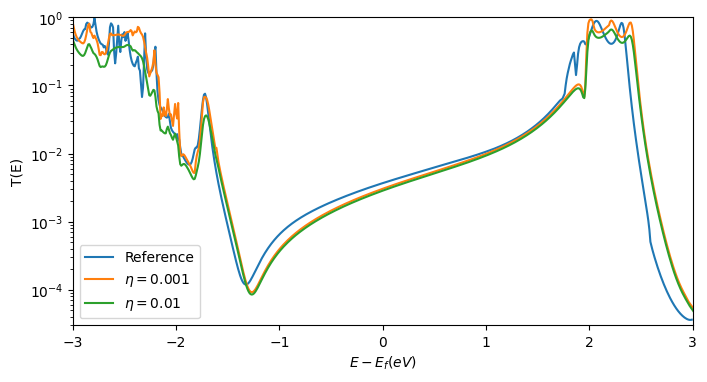

In [5]:
etas = [1e-3, 1e-2]
# etas = [1e-3]
plt.figure(figsize=(8,4))
reference = np.loadtxt("transmission_function_method1/reference/ET_hs.dat")
plt.plot(reference[:,0],reference[:,1],label='Reference')

for eta in etas:
    E,T = np.load(f'transmission_function_method1/bda_active/ET_eta{eta}.npy')
    plt.plot(E,T,label=rf'$\eta = {eta}$')

    if any(value > 1 for value in T):
        print(f"Warning: Values in T for eta={eta} exceed 1.")

plt.xlim(-3,3)
plt.xlabel(r'$E-E_{f}(eV)$')
plt.ylabel('T(E)')
plt.yscale('log')
plt.ylim(3e-5,1)
plt.legend()

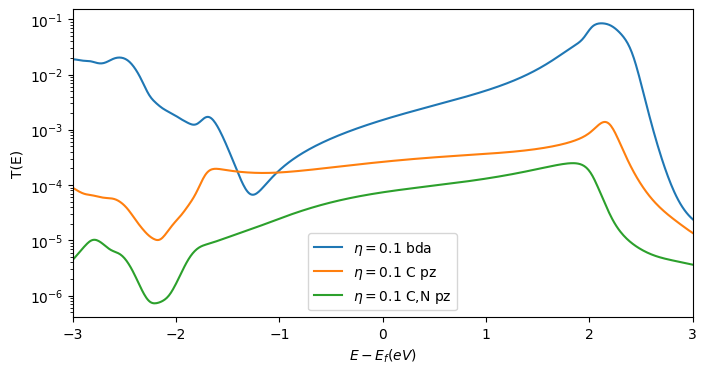

In [2]:
etas = [1e-1]
# etas = [1e-3]
plt.figure(figsize=(8,4))
for eta in etas:
    E,T = np.load(f'transmission_function_method1/bda_active/ET_eta{eta}.npy')
    E1,T1 = np.load(f'transmission_function_method1/C_2pz_active/ET_eta{eta}_test.npy')
    E2,T2 = np.load(f'transmission_function_method1/C_N_2pz_active/ET_eta{eta}.npy')
    plt.plot(E,T,label=rf'$\eta = {eta}$ bda')
    plt.plot(E1,T1,label=rf'$\eta = {eta}$ C pz')
    plt.plot(E2,T2,label=rf'$\eta = {eta}$ C,N pz')

    if any(value > 1 for value in T):
        print(f"Warning: Values in T for eta={eta} exceed 1.")

plt.xlim(-3,3)
plt.xlabel(r'$E-E_{f}(eV)$')
plt.ylabel('T(E)')
plt.yscale('log')
# plt.ylim(3e-5,1)
plt.legend()

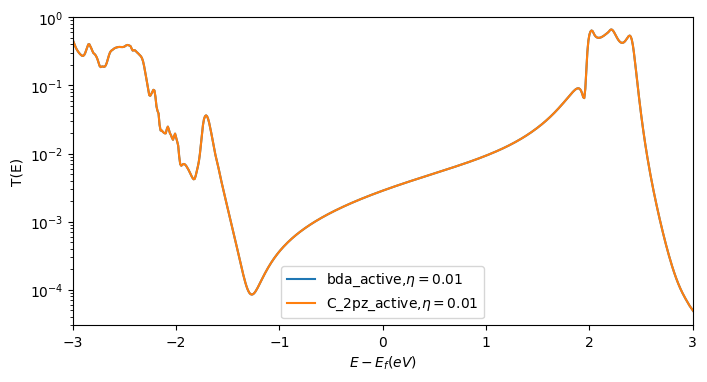

In [12]:
eta = 1e-2
active_sites = ["bda_active", "C_2pz_active"]
Ts = {}
plt.figure(figsize=(8,4))
for active in active_sites:
    E,Ts[active] = np.load(f'transmission_function_method1/{active}/ET_eta{eta}.npy')
    plt.plot(E,Ts[active],label=rf'{active},$\eta = {eta}$')

plt.xlim(-3,3)
plt.xlabel(r'$E-E_{f}(eV)$')
plt.ylabel('T(E)')
plt.yscale('log')
plt.ylim(3e-5,1)
plt.legend()

## Compare transmission method 1 and transmission method 2

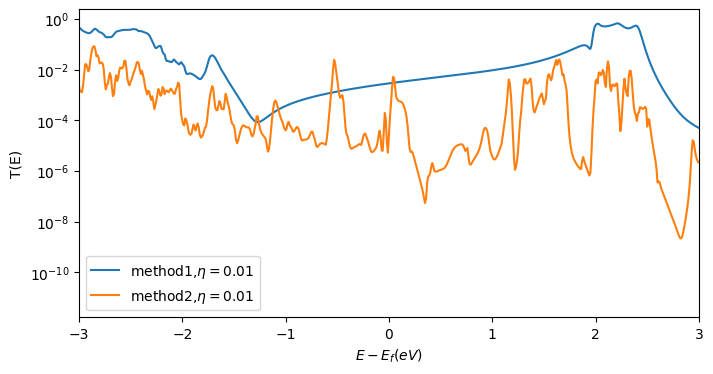

In [41]:
eta = 1e-2
methods = ["method1","method2"]
active_sites = ["bda_active"]
plt.figure(figsize=(8,4))
for method in methods:
    for active in active_sites:
        E,T = np.load(f'transmission_function_{method}/{active}/ET_eta{eta}.npy')
        plt.plot(E,T,label=rf'{method},$\eta = {eta}$')

plt.xlim(-3,3)
plt.xlabel(r'$E-E_{f}(eV)$')
plt.ylabel('T(E)')
plt.yscale('log')
# plt.ylim(3e-5,1)
plt.legend()

### method 2 clearly doesn't work. Now look at various variables like node, hslist_ii etc being produced